<a href="https://colab.research.google.com/github/ayanbabusona/tensorflow/blob/master/Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
df = pd.read_excel('/content/gdrive/My Drive/RLR_Rate_Observed.xlsx')
#df1 = pd.read_excel('/content/gdrive/My Drive/Testexcel.xlsx')
df.head()
#df1.head()

,Before Signal Timing Changes,After Signal Timing Changes
0,0.0,0.0
1,0.0,1.1
2,11.4,2.1
3,12.6,9.8
4,17.2,10.1


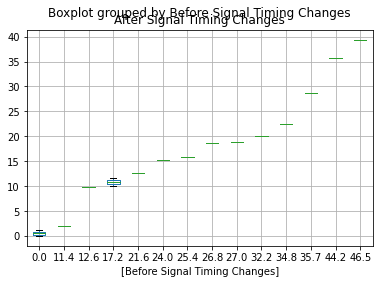

In [0]:
boxplot = df.boxplot(by = 'Before Signal Timing Changes')

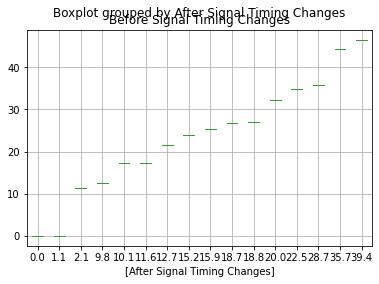

In [0]:
boxplot = df.boxplot(by = 'After Signal Timing Changes')

In [0]:
df1 = pd.read_excel('/content/gdrive/My Drive/TestExcel.xlsx')
df1.head()

,Time_WH,Unnamed: 1,RLR_Rates,Time_W,RLR
0,1.1,NaN,20.0,0.0,23.1
1,1.2,NaN,20.2,0.0,24.1
2,2.1,NaN,20.4,0.0,24.3
3,8.1,NaN,20.5,0.0,24.7
4,8.1,NaN,21.2,2.3,24.9


(array([6., 9., 5., 2., 5., 2., 1., 2., 0., 6.]),
 array([23.1 , 25.24, 27.38, 29.52, 31.66, 33.8 , 35.94, 38.08, 40.22,
        42.36, 44.5 ]),
 <a list of 10 Patch objects>)

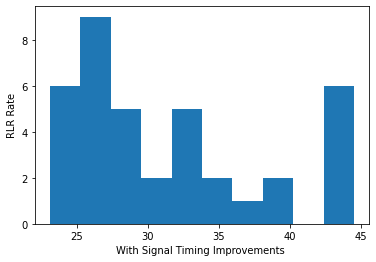

In [0]:
plt.xlabel('With Signal Timing Improvements ')
plt.ylabel('RLR Rate')
plt.hist(df1['RLR'])

In [0]:
m=df['Before Signal Timing Changes'].mean()
m1=df['After Signal Timing Changes'].mean()
std=df.std(axis=0)
print(m,m1)
std

23.5375 16.393749999999997


Before Signal Timing Changes    13.636709
After Signal Timing Changes     11.381884
dtype: float64

In [0]:
m2=df1['Time_WH'].mean()
m3=df1['RLR_Rates'].mean()
m4=df1['Time_W'].mean()
m5=df1['RLR'].mean()
std1=df1.std(axis=0)
print(m2,m3,m4,m5)
std1

15.139473684210529 32.765789473684215 13.710526315789474 31.56842105263159


Time_WH        6.924283
Unnamed: 1          NaN
RLR_Rates     11.002758
Time_W         7.312994
RLR            6.910396
dtype: float64

In [0]:
import statistics
sample = [13.636709,11.381884,6.924283,11.002758,7.312994,6.910396]
print("Standard Deviation of sample is % s " % (statistics.stdev(sample)))

Standard Deviation of sample is 2.8646371851555417 


In [0]:
import pandas as pd
from scipy import stats
df[['Before Signal Timing Changes','After Signal Timing Changes']].describe()

,Before Signal Timing Changes,After Signal Timing Changes
count,16.000000,16.000000
mean,23.537500,16.393750
std,13.636709,11.381884
min,0.000000,0.000000
25%,16.050000,10.025000
50%,24.700000,15.550000
75%,32.850000,20.625000
max,46.500000,39.400000


In [0]:
ttest,pval = stats.ttest_rel(df['Before Signal Timing Changes'], df['After Signal Timing Changes'])
print(pval)

1.622556737522668e-06


In [0]:
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

reject null hypothesis


In [0]:
df1[['Time_WH','RLR_Rates','Time_W','RLR']].describe()

,Time_WH,RLR_Rates,Time_W,RLR
count,38.000000,38.000000,38.000000,38.000000
mean,15.139474,32.765789,13.710526,31.568421
std,6.924283,11.002758,7.312994,6.910396
min,1.100000,19.200000,0.000000,23.100000
25%,9.875000,23.325000,9.575000,26.250000
50%,15.850000,29.450000,15.400000,28.900000
75%,20.350000,40.150000,19.725000,35.475000
max,29.800000,58.500000,22.900000,44.500000


In [0]:
ttest,pval = stats.ttest_rel(df1['RLR_Rates'],df1['RLR'])
print(pval)

0.3107877918967822


In [0]:
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

accept null hypothesis


In [0]:
import pandas as pd
from scipy import stats
from statsmodels.stats import weightstats as stests
ztest ,pval1 = stests.ztest(df['Before Signal Timing Changes'], x2=df['After Signal Timing Changes'], value=0,alternative='two-sided')
print(float(pval1))
if pval1<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

0.10767661435318368
accept null hypothesis


In [0]:
ttest,pval = stats.ttest_rel(df1['Time_WH'],df1['Time_W'])
print(pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

0.004033529607500283
reject null hypothesis
